# Feature extraction

In [2]:
# Imports
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
import sys
import matplotlib.pyplot as plt
from master_data_functions.functions import import_data,save_feature_representation,load_feature_representation
from master_models.pretrained import pretrained_model
from master_data_functions.functions import double_event_distance, get_close_events
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
# Import data

# File import
# Sample filenames are:
# CeBr10kSingle_1.txt -> single events, 
# CeBr10kSingle_2.txt -> single events
# CeBr10k_1.txt -> mixed single and double events 
# CeBr10.txt -> small file of 10 samples
# CeBr2Mil_Mix.txt -> 2 million mixed samples of simulated events

# Flag import, since we can now import 200k events from .npy files
from_file = False
if from_file:

    folder = "simulated"
    filename = "CeBr2Mil_Mix.txt"
    num_samples = 2e5
    #folder = "sample"
    #filename = "CeBr10k_1.txt"
    #num_samples = 1e3

    data = import_data(folder=folder, filename=filename, num_samples=num_samples)
    images = data[filename]["images"]
    energies = data[filename]["energies"]
    positions = data[filename]["positions"]
    labels = to_categorical(data[filename]["labels"])
    n_classes = labels.shape[1]
else:
    images = load_feature_representation("images_200k.npy")
    energies = load_feature_representation("energies_200k.npy")
    positions = load_feature_representation("positions_200k.npy")
    labels = load_feature_representation("labels_200k.npy")

n_classes = labels.shape[1]
print("Number of classes: {}".format(n_classes))
print("Input Images shape: {}".format(images.shape))
print("Energies shape: {}".format(energies.shape))
print("Positions shape: {}".format(positions.shape))
print("Labels shape: {}".format(labels.shape))

# VGG16 expects 3 channels. Solving this by concatenating the image data 
# to itself, to form three identical channels

images = np.concatenate((images, images, images), axis=3)
print("Reshaped Images data shape: {}".format(images.shape))

Number of classes: 2
Images shape: (200000, 16, 16, 1)
Energies shape: (200000, 2)
Positions shape: (200000, 4)
Labels shape: (200000, 2)
Image data shape: (200000, 16, 16, 3)


## Save feature representations for all models

In [5]:
# Keys: model names, Values: depth to compare at.
pretrained_models = {
    "DenseNet121":None, #8
    "DenseNet169":None, #8
    "DenseNet201":None, #8
    "InceptionResNetV2":None, #8
    "InceptionV3":None, #8
    "MobileNet":None, #8
    "MobileNetV2":None, #5
    "NASNetLarge":None, #4
    "NASNetMobile":None, #4
    "ResNet50":None, #8
    "VGG16":None,
    "VGG19":None,
    "Xception":None, #6
    }

In [ ]:

for net, depth in pretrained_models.items():
    print("Running for:", net)
    # Build net at desired depth
    pretrained = pretrained_model(which_model=net, output_depth=depth)
    
    # Extract features and split them into single and double
    pretrained_features = pretrained.predict(images)
    
    if depth is None:
        depth = "full"
    features_filename = net + "_d" + str(depth) + "_" + str(pretrained_features.shape[0]) + "npy"
    save_feature_representation(pretrained_features, features_filename)
    
    # Delete to free memory for next iteration just in case
    del pretrained_features



## Test feature distribution

In [4]:
# Define Kolmogorov-Smirnov test
from scipy.stats import ks_2samp
from joblib import Parallel, delayed
# Check difference using Kolmogorov-Smirnov

def get_pval(i):
    ks = ks_2samp(single_features[:,i], double_features[:,i])
    return ks.pvalue


#### Compare single and double features

Running for: DenseNet121


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    2.5s finished


Running for: DenseNet169


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    1.6s finished


Running for: DenseNet201


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    1.6s finished


Running for: InceptionResNetV2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.0s finished


Running for: InceptionV3


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:    1.0s finished


Running for: MobileNet


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 423 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1235 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done 2048 out of 2048 | elapsed:    9.4s finished


Running for: MobileNetV2


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 384 out of 384 | elapsed:    1.2s finished


Running for: NASNetLarge


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 420 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1232 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 2058 out of 2058 | elapsed:   10.5s finished


Running for: NASNetMobile


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 539 out of 539 | elapsed:    1.6s finished


Running for: ResNet50


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   35.1s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   45.7s
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed:   57.7s
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4096 out of 4096 | elapsed:  1.2min finished


Running for: VGG16


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    1.6s finished


Running for: VGG19


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:    1.6s finished


Running for: Xception


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:   42.8s
[Parallel(n_jobs=-1)]: Done 3200 out of 3200 | elapsed:   53.0s finished


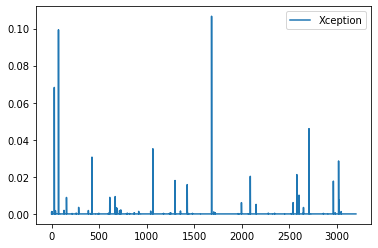

In [9]:
# Run test on all pretrained nets.
p_output = {}


for net, depth in pretrained_models.items():
    print("Running for:", net)
    
    # Load features
    if depth is None:
        depth = "full"
    features_filename = net + "_d" + str(depth) + "_" + str(pretrained_features.shape[0]) + ".npy"
    pretrained_features = load_feature_representation(features_filename)
    single_features = pretrained_features[np.where(labels[:,0] == 1)]
    double_features = pretrained_features[np.where([:,1] == 1)]
    n = pretrained_features.shape[1]
    p_values = Parallel(n_jobs=-1, verbose=2)(delayed(get_pval)(i) for i in range(n))
    p_output[net] = p_values
    
    plt.close()
    plt.plot(range(len(p_values)), p_values, label=net)
    plt.legend()
    plt.savefig(net + "-p-vals.png")
    
    # Delete allocated arrays for saving memory in notebook
    del pretrained_features
    del single_features

#### Compare single events and close double events
'Close' double events are events separated by a distance less than 3 mm.
This length is chose because that is the width of one pixel in the image data, and
it is below this distance that the models seem to struggle the most.

In [6]:
# Run test on all pretrained nets.
p_output = {}


for net, depth in pretrained_models.items():
    print("Running for:", net)
    
    # Load features
    if depth is None:
        depth = "full"
    features_filename = net + "_d" + str(depth) + "_" + str(images.shape[0]) + ".npy"
    pretrained_features = load_feature_representation(features_filename)
    single_features = pretrained_features[np.where(labels[:,0] == 1)]
    double_indices, close_indices = get_close_events(positions)
    double_features = pretrained_features[double_indices][close_indices]
    n = pretrained_features.shape[1]
    p_values = Parallel(n_jobs=-1, verbose=2)(delayed(get_pval)(i) for i in range(n))
    p_output[net] = p_values
    
    plt.close()
    plt.plot(range(len(p_values)), p_values, label=net)
    plt.legend()
    plt.savefig(net + "_close" + "-p-vals.png")
    
    # Delete allocated arrays for saving memory in notebook
    del pretrained_features
    del single_features
    



SyntaxError: invalid syntax (<ipython-input-6-ae3500e27fea>, line 14)

## (Optional) Plot features for some samples

In [ ]:
manual_inspect = False
if manual_inspect:
    # Compare feature output for reference image with a single and double image
    plt.plot(range(len(reference_features[0])), reference_features[0], alpha=0.5, label='reference')
    plt.plot(range(len(single_features[0])), single_features[0], alpha=0.5, label='single')
    plt.plot(range(len(double_features[0])), double_features[0], alpha=0.5, label='double')
    plt.legend()
    plt.show()
    
    # Check distribution of features by inspection
    index = 0 
    fig, ax = plt.subplots(3, 3, sharex='col', sharey='row', figsize=(12,12))
    for i in range(3):
        for j in range(3):
            # plot features
            ax[i, j].hist(single_features[:,index + i*3 + j], alpha=0.5, label='single')
            ax[i, j].hist(double_features[:,index + i*3 + j], alpha=0.5, label='double')
            ax[i, j].hist(ref_vgg_features, alpha=0.5, label='reference')
            ax[i, j].legend()
    plt.show()